# introduction to scikit learn primer

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Import the file
df = pd.read_csv('../TextFiles/smsspamcollection.tsv' , sep = '\t')

In [3]:
# check the head of the file
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# check the length of the file
len(df)

5572

In [5]:
# check the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [6]:
# check the value counts of the label column
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
# check the description
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
# check if there are any null values or not
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
# check for the unique labels
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
# Import the visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
plt.style.use('seaborn')

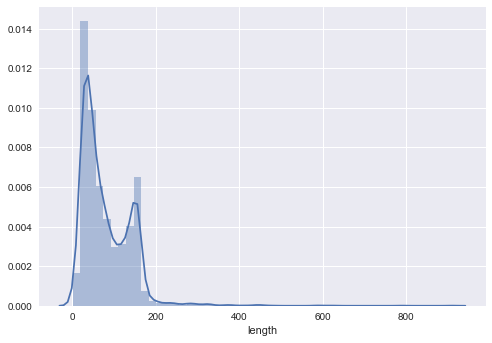

In [13]:
# Plot a histogram
sns.distplot(df['length'])

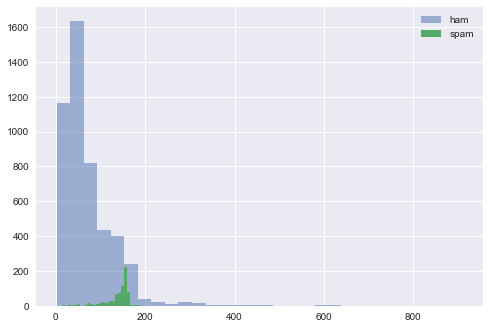

In [14]:
plt.hist(df[df['label'] == 'ham']['length'] , bins = 30 , alpha = 0.5)
plt.hist(df[df['label'] == 'spam']['length'] , bins = 30 )
plt.legend(['ham' , 'spam']);

In [15]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

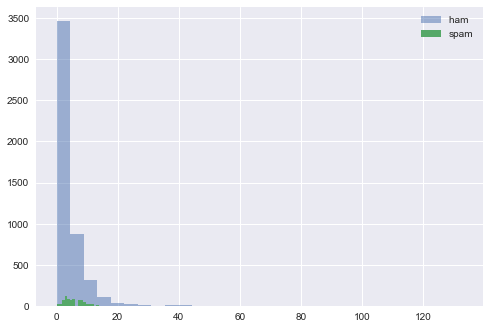

In [16]:
plt.hist(df[df['label'] == 'ham']['punct'] , bins = 30 , alpha = 0.5)
plt.hist(df[df['label'] == 'spam']['punct'] , bins = 30)
plt.legend(['ham ' , 'spam']);

# split the data into training and test set:

In [17]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [18]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [19]:
# define the data

x = df.drop(['label' , 'message'] , axis = 1)

y = df['label']

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [21]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4457, 2), (1115, 2), (4457,), (1115,))

# Train a logistic regression classifier

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr_model.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
a = lr_model.score(x_test , y_test)

# predictions

In [25]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score



y_preds = lr_model.predict(x_test)

In [26]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

         ham       0.86      0.98      0.91       955
        spam       0.12      0.02      0.03       160

    accuracy                           0.84      1115
   macro avg       0.49      0.50      0.47      1115
weighted avg       0.75      0.84      0.79      1115



In [27]:
print(confusion_matrix(y_test , y_preds))

[[932  23]
 [157   3]]


In [28]:
print(accuracy_score(y_test , y_preds))

0.8385650224215246


In [29]:
df = pd.DataFrame(confusion_matrix(y_test , y_preds) ,columns=['ham' , 'spam'] , index=['ham' , 'spam'] )

In [30]:
df

,ham,spam
ham,932,23
spam,157,3


# training a Naive bayers classifier

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(x_train , y_train)
b = nb_model.score(x_test , y_test)

# Training a Random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train , y_train)
c = model.score(x_test , y_test)

In [79]:
df = pd.DataFrame({'Logistic regression' : a ,
     'Naive bayers' : b ,
     'Random forest' : c} , index=['a'])

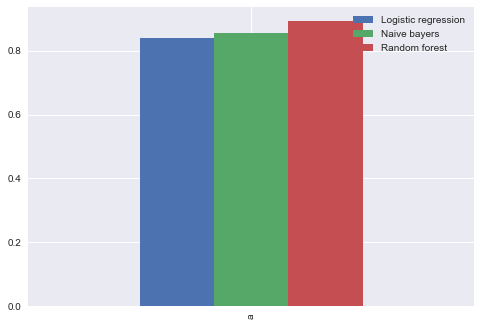

In [80]:
df.plot(kind = 'bar')

### From the above figure we conclude that Random forest classifier has proven the best classifier for spam detection.

# Thanks